# **프로그래밍3 201902138 권은비 최종분석과제**

## 이동통신 사용자 데이터 상관관계 분석

### 데이터 설명

- 해당 데이터는 이동통신 사용자 데이터이다.

### 데이터 탐색 및 분석 포인트

- 데이터 셋을 확인한다.
- 데이터 전처리 과정을 치룬다.
- 분석 포인트 3가지로 분석할 예정이다.

1. 월평균 전화량이 많을수록 월평균 전화횟수가 많을까?  번외) 전화량이 많은 사람들의 공통점은 무엇일까?
2. 월평균 요금이 적으면 초과요금이 나오는 경우가 많을까?
3. 가입기간이 길면 초과요금이 적을까?

- 시각화/ 그래프 활용하여 비교분석
- 결과 의미도출

In [1]:
#필요한 import
import pandas as pd
import numpy as np

In [2]:
#파일 읽어오기
df = pd.read_csv('data/telco.csv')

## 데이터 셋 확인

In [3]:
#상위 10개 데이터 확인
df.head(10)

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
5,0,118,0,0,0.00,0,223.4,98,57.0,11.03,6.3
6,0,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
7,0,147,0,0,0.00,0,157.0,79,36.0,5.16,7.1
8,0,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7
9,0,141,0,1,3.02,0,258.6,84,93.2,11.10,11.2


In [4]:
#해당 데이터는 DataFrame이다.
#3333개의 엔트리를 가지고 있으며, 색인이 0부터 3332까지 할당.
#11개의 컬럼을 가지고 있다.
#int64 타입 6개, float64 타입 5개를 가지고 있다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Leave        3333 non-null   int64  
 1   MemberWeeks  3333 non-null   int64  
 2   NewContract  3333 non-null   int64  
 3   IsData       3333 non-null   int64  
 4   DataAmount   3333 non-null   float64
 5   Callcenter   3333 non-null   int64  
 6   CalMins      3333 non-null   float64
 7   CalCounts    3333 non-null   int64  
 8   MonthlyFee   3333 non-null   float64
 9   OverFee      3333 non-null   float64
 10  RoamingMin   3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [5]:
#결측값 확인
df.isnull().sum().sum()

0

결측값이 없음을 확인.

In [6]:
#행과 열의 갯수 확인
df.shape

(3333, 11)

In [7]:
#컬럼정보 확인
df.columns

Index(['Leave', 'MemberWeeks', 'NewContract', 'IsData', 'DataAmount',
       'Callcenter', 'CalMins', 'CalCounts', 'MonthlyFee', 'OverFee',
       'RoamingMin'],
      dtype='object')

## 데이터 전처리

- 한글 오류 우려가 있을 수 있지만, 보기 쉽게 한국어로 컬럼명 변경

In [8]:
#컬럼명 변경 전처리
df.rename(columns={
    'Leave':"가입해지여부",
    'MemberWeeks':"가입기간",
    'NewContract':"가입갱신여부",
    'IsData':"데이터요금제사용여부",
    'DataAmount':"데이터사용량(GB)",
    'Callcenter':"고객센터전화량",
    'CalMins':"월평균전화량(분)",
    'CalCounts':"월평균전화수(횟수)",
    'MonthlyFee':"월평균요금",
    'OverFee':"초과요금",
    'RoamingMin':"로밍시간(분)"
},
         inplace=True)

In [9]:
#전체 데이터 확인
df

,가입해지여부,가입기간,가입갱신여부,데이터요금제사용여부,데이터사용량(GB),고객센터전화량,월평균전화량(분),월평균전화수(횟수),월평균요금,초과요금,로밍시간(분)
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [10]:
#재확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   가입해지여부      3333 non-null   int64  
 1   가입기간        3333 non-null   int64  
 2   가입갱신여부      3333 non-null   int64  
 3   데이터요금제사용여부  3333 non-null   int64  
 4   데이터사용량(GB)  3333 non-null   float64
 5   고객센터전화량     3333 non-null   int64  
 6   월평균전화량(분)   3333 non-null   float64
 7   월평균전화수(횟수)  3333 non-null   int64  
 8   월평균요금       3333 non-null   float64
 9   초과요금        3333 non-null   float64
 10  로밍시간(분)     3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
가입해지여부,3333.0,0.144914,0.352067,0.0,0.00,0.00,0.00,1.00
가입기간,3333.0,101.064806,39.822106,1.0,74.00,101.00,127.00,243.00
가입갱신여부,3333.0,0.903090,0.295879,0.0,1.00,1.00,1.00,1.00
데이터요금제사용여부,3333.0,0.276628,0.447398,0.0,0.00,0.00,1.00,1.00
데이터사용량(GB),3333.0,0.816475,1.272668,0.0,0.00,0.00,1.78,5.40
고객센터전화량,3333.0,1.562856,1.315491,0.0,1.00,1.00,2.00,9.00
월평균전화량(분),3333.0,179.775098,54.467389,0.0,143.70,179.40,216.40,350.80
월평균전화수(횟수),3333.0,100.435644,20.069084,0.0,87.00,101.00,114.00,165.00
월평균요금,3333.0,56.305161,16.426032,14.0,45.00,53.50,66.20,111.30
초과요금,3333.0,10.051488,2.535712,0.0,8.33,10.07,11.77,18.19


In [12]:
df.select_dtypes(include=["object"]).nunique()

Series([], dtype: float64)

In [13]:
np.iinfo('int64')

iinfo(min=-9223372036854775808, max=9223372036854775807, dtype=int64)

In [14]:
np.iinfo('int16')

iinfo(min=-32768, max=32767, dtype=int16)

In [15]:
np.finfo('float64')

finfo(resolution=1e-15, min=-1.7976931348623157e+308, max=1.7976931348623157e+308, dtype=float64)

In [16]:
np.finfo('float16')

finfo(resolution=0.001, min=-6.55040e+04, max=6.55040e+04, dtype=float16)

### 메모리 사용량 줄이기

In [17]:
#메모리 사용량 줄이기
df2=df.astype({
    '가입해지여부':np.int16,
    '가입기간':np.int16,
    '가입갱신여부':np.int16,
    '데이터요금제사용여부':np.int16,
    '데이터사용량(GB)':np.int16,
    '고객센터전화량':np.int16,
    '월평균전화량(분)':np.float16,
    '월평균전화수(횟수)':np.int16,
    '월평균요금':np.float16,
    '초과요금':np.float16,
    '로밍시간(분)':np.float16}
)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   가입해지여부      3333 non-null   int16  
 1   가입기간        3333 non-null   int16  
 2   가입갱신여부      3333 non-null   int16  
 3   데이터요금제사용여부  3333 non-null   int16  
 4   데이터사용량(GB)  3333 non-null   int16  
 5   고객센터전화량     3333 non-null   int16  
 6   월평균전화량(분)   3333 non-null   float16
 7   월평균전화수(횟수)  3333 non-null   int16  
 8   월평균요금       3333 non-null   float16
 9   초과요금        3333 non-null   float16
 10  로밍시간(분)     3333 non-null   float16
dtypes: float16(4), int16(7)
memory usage: 71.7 KB


In [18]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
가입해지여부,3333.0,0.144914,0.352067,0.0,0.000000,0.000000,0.000000,1.0000
가입기간,3333.0,101.064806,39.822106,1.0,74.000000,101.000000,127.000000,243.0000
가입갱신여부,3333.0,0.903090,0.295879,0.0,1.000000,1.000000,1.000000,1.0000
데이터요금제사용여부,3333.0,0.276628,0.447398,0.0,0.000000,0.000000,1.000000,1.0000
데이터사용량(GB),3333.0,0.635764,1.110332,0.0,0.000000,0.000000,1.000000,5.0000
고객센터전화량,3333.0,1.562856,1.315491,0.0,1.000000,1.000000,2.000000,9.0000
월평균전화량(분),3333.0,inf,54.468750,0.0,143.750000,179.375000,216.375000,350.7500
월평균전화수(횟수),3333.0,100.435644,20.069084,0.0,87.000000,101.000000,114.000000,165.0000
월평균요금,3333.0,inf,16.421875,14.0,45.000000,53.500000,66.187500,111.3125
초과요금,3333.0,10.054688,2.535156,0.0,8.328125,10.070312,11.773438,18.1875


- 일부 데이터타입을 잘못 변경하여 재변경

In [19]:
np.finfo('float32')

finfo(resolution=1e-06, min=-3.4028235e+38, max=3.4028235e+38, dtype=float32)

In [20]:
#메모리 사용량 줄이기
df3=df.astype({
    '가입해지여부':np.int16,
    '가입기간':np.int16,
    '가입갱신여부':np.int16,
    '데이터요금제사용여부':np.int16,
    '데이터사용량(GB)':np.int16,
    '고객센터전화량':np.int16,
    '월평균전화량(분)':np.float32,
    '월평균전화수(횟수)':np.int16,
    '월평균요금':np.float32,
    '초과요금':np.float16,
    '로밍시간(분)':np.float16}
)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   가입해지여부      3333 non-null   int16  
 1   가입기간        3333 non-null   int16  
 2   가입갱신여부      3333 non-null   int16  
 3   데이터요금제사용여부  3333 non-null   int16  
 4   데이터사용량(GB)  3333 non-null   int16  
 5   고객센터전화량     3333 non-null   int16  
 6   월평균전화량(분)   3333 non-null   float32
 7   월평균전화수(횟수)  3333 non-null   int16  
 8   월평균요금       3333 non-null   float32
 9   초과요금        3333 non-null   float16
 10  로밍시간(분)     3333 non-null   float16
dtypes: float16(2), float32(2), int16(7)
memory usage: 84.8 KB


In [21]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
가입해지여부,3333.0,0.144914,0.352067,0.0,0.000000,0.000000,0.000000,1.000000
가입기간,3333.0,101.064806,39.822106,1.0,74.000000,101.000000,127.000000,243.000000
가입갱신여부,3333.0,0.903090,0.295879,0.0,1.000000,1.000000,1.000000,1.000000
데이터요금제사용여부,3333.0,0.276628,0.447398,0.0,0.000000,0.000000,1.000000,1.000000
데이터사용량(GB),3333.0,0.635764,1.110332,0.0,0.000000,0.000000,1.000000,5.000000
고객센터전화량,3333.0,1.562856,1.315491,0.0,1.000000,1.000000,2.000000,9.000000
월평균전화량(분),3333.0,179.775131,54.467442,0.0,143.699997,179.399994,216.399994,350.799988
월평균전화수(횟수),3333.0,100.435644,20.069084,0.0,87.000000,101.000000,114.000000,165.000000
월평균요금,3333.0,56.305111,16.426031,14.0,45.000000,53.500000,66.199997,111.300003
초과요금,3333.0,10.054688,2.535156,0.0,8.328125,10.070312,11.773438,18.187500


- 286.6 KB -> 84.8 KB 1차 메모리 줄이기 성공! 

In [22]:
#0과1값만 있는 것을 category로 변경하여 메모리 사용량 줄이기
df4=df3.astype({
    '가입해지여부':'category',
    '가입갱신여부':'category',
    '데이터요금제사용여부':'category'
}
)
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   가입해지여부      3333 non-null   category
 1   가입기간        3333 non-null   int16   
 2   가입갱신여부      3333 non-null   category
 3   데이터요금제사용여부  3333 non-null   category
 4   데이터사용량(GB)  3333 non-null   int16   
 5   고객센터전화량     3333 non-null   int16   
 6   월평균전화량(분)   3333 non-null   float32 
 7   월평균전화수(횟수)  3333 non-null   int16   
 8   월평균요금       3333 non-null   float32 
 9   초과요금        3333 non-null   float16 
 10  로밍시간(분)     3333 non-null   float16 
dtypes: category(3), float16(2), float32(2), int16(4)
memory usage: 75.3 KB


- 286.6 KB -> 75.3 KB 2차 메모리 줄이기 성공!

In [23]:
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
가입기간,3333.0,101.064806,39.822106,1.0,74.000000,101.000000,127.000000,243.000000
데이터사용량(GB),3333.0,0.635764,1.110332,0.0,0.000000,0.000000,1.000000,5.000000
고객센터전화량,3333.0,1.562856,1.315491,0.0,1.000000,1.000000,2.000000,9.000000
월평균전화량(분),3333.0,179.775131,54.467442,0.0,143.699997,179.399994,216.399994,350.799988
월평균전화수(횟수),3333.0,100.435644,20.069084,0.0,87.000000,101.000000,114.000000,165.000000
월평균요금,3333.0,56.305111,16.426031,14.0,45.000000,53.500000,66.199997,111.300003
초과요금,3333.0,10.054688,2.535156,0.0,8.328125,10.070312,11.773438,18.187500
로밍시간(분),3333.0,10.234375,2.791016,0.0,8.500000,10.296875,12.101562,20.000000


- 각각의 평균, 중앙값 등을 확인해볼 수 있었다.

## 첫번째 분석포인트

- 월평균 전화량이 많을 수록 월평균 전화횟수가 많을까?
- 라는 분석포인트를 선정하게 된 이유는 통화를 길게하는 사람의 경우 다양한 상황이 많겠지만,
- 전화를 좋아하는 경우가 많아 오래 전화하고 여러 사람과 많이 통화할 것이라고 생각하여 이를 중점적으로 생각하며 분석해보았다.

In [24]:
#필요데이터만 선정
df5 = df4[['월평균전화량(분)', '월평균전화수(횟수)']]
df5

,월평균전화량(분),월평균전화수(횟수)
0,265.100006,110
1,161.600006,123
2,243.399994,114
3,299.399994,71
4,166.699997,113
...,...,...
3328,156.199997,77
3329,231.100006,57
3330,180.800003,109
3331,213.800003,105


In [25]:
#월평균전화수(횟수)의 최대값 순서배열 
(
df5.sort_values(['월평균전화수(횟수)','월평균전화량(분)'], ascending = False)
.drop_duplicates(subset='월평균전화수(횟수)')
)

,월평균전화량(분),월평균전화수(횟수)
1121,154.399994,165
468,70.900002,163
1460,198.100006,160
2392,125.400002,158
2394,189.300003,157
...,...,...
740,230.600006,40
692,185.800003,36
1989,144.500000,35
1144,216.699997,30


- 월평균전화횟수는 165번 가장 많았다. (평균은 약 100번)

In [26]:
#월평균전화량(분)의 최대값 순서배열 
(
df5.sort_values(['월평균전화량(분)','월평균전화수(횟수)'], ascending = False)
.drop_duplicates(subset='월평균전화량(분)')
)

,월평균전화량(분),월평균전화수(횟수)
365,350.799988,75
985,346.799988,55
2594,345.299988,81
156,337.399994,120
605,335.500000,77
...,...,...
1052,12.500000,67
1986,7.900000,100
2753,7.800000,86
2736,2.600000,113


- 가장 많은 월평균전화량은 약 350분이다. (평균은 약 179분)
- 두 개의 표를 보았을 때 상이함을 예측할 수 있다.

In [27]:
#변수의 상관관계
df5.corr()

,월평균전화량(분),월평균전화수(횟수)
월평균전화량(분),1.00000,0.00675
월평균전화수(횟수),0.00675,1.00000


## 시각화

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns  

<ipython-input-84-95ef85d39782>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df5.hist(ax=ax)


array([[<AxesSubplot:title={'center':'월평균전화량(분)'}>,
        <AxesSubplot:title={'center':'월평균전화수(횟수)'}>]], dtype=object)

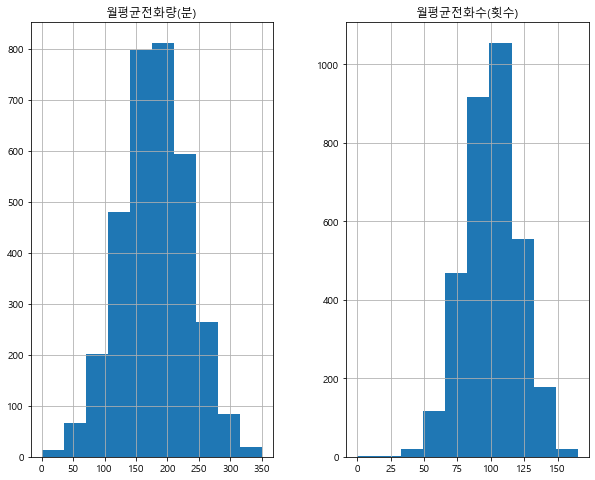

In [84]:
#히스토그램을 통해 대략적인 분포를 파악
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
df5.hist(ax=ax)

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-

<AxesSubplot:>

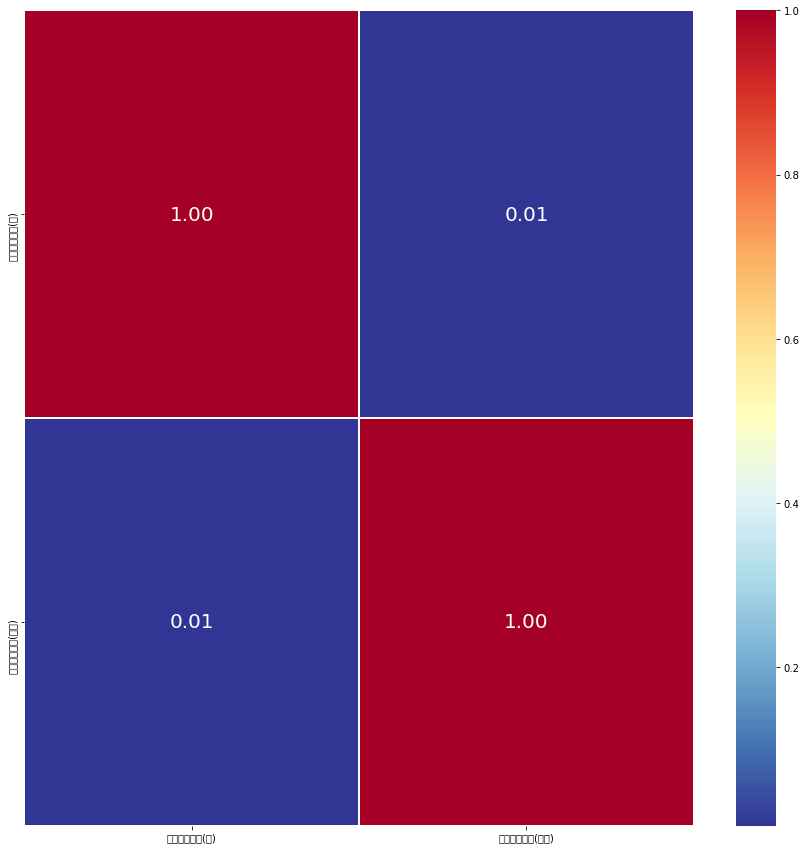

In [29]:
#변수간 상관관계 분석 그래프
plt.figure(figsize=(15,15))
sns.heatmap(data = df5.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap = 'RdYlBu_r', annot_kws = {'size' : 20})

In [30]:
#한글 깨짐 오류 정정 - 폰트 설정하기
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    
matplotlib.rcParams['axes.unicode_minus'] = False

<AxesSubplot:>

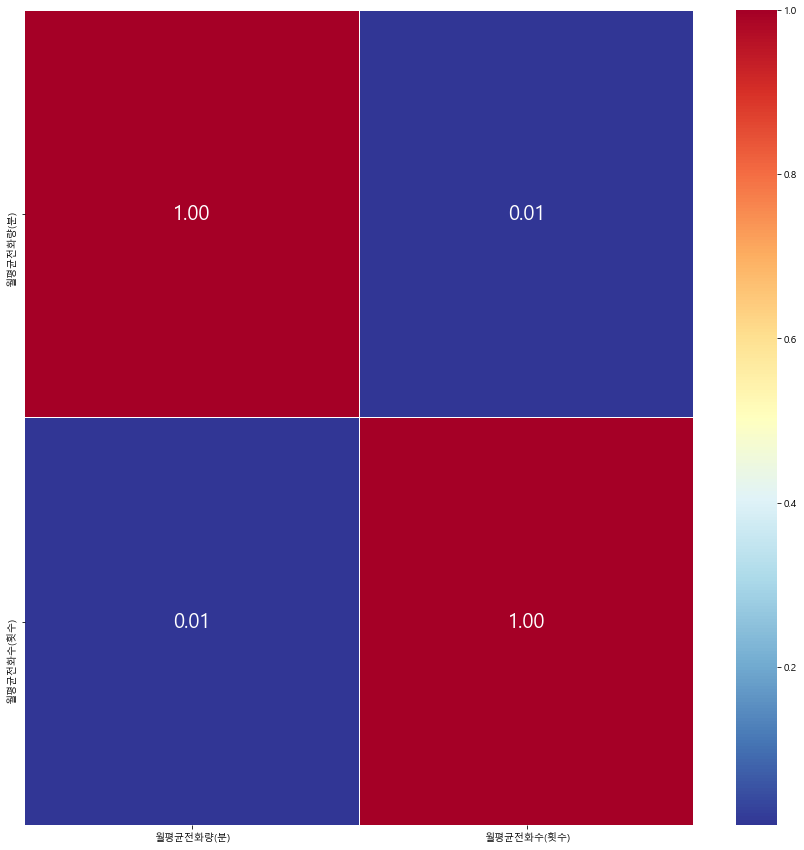

In [31]:
#변수간 상관관계 분석 그래프
plt.figure(figsize=(15,15))
sns.heatmap(data = df5.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap = 'RdYlBu_r', annot_kws = {'size' : 20})

- 0.01로 낮은 수치가 나왔다.

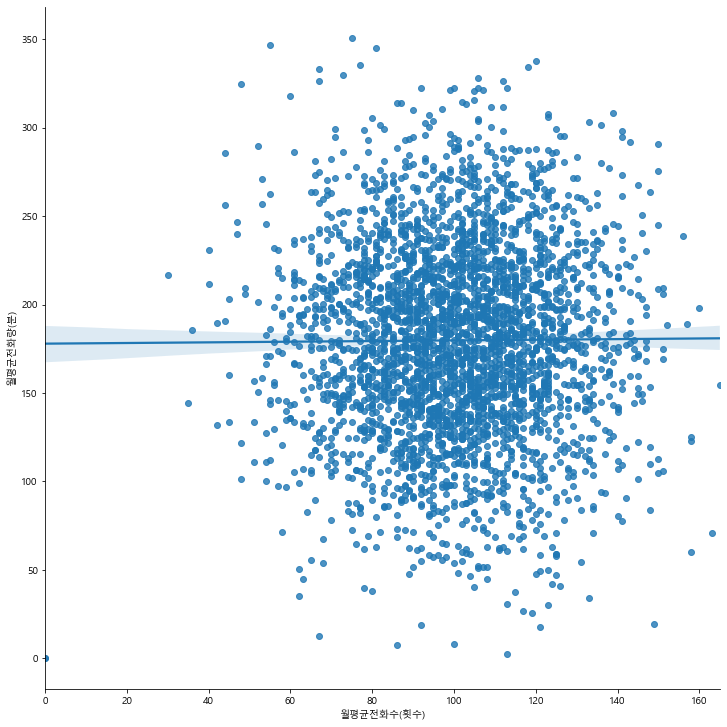

In [32]:
# 상관관계에 회귀선 추가
sns.lmplot(x="월평균전화수(횟수)", y="월평균전화량(분)", height=10, data=df2)
plt.show()

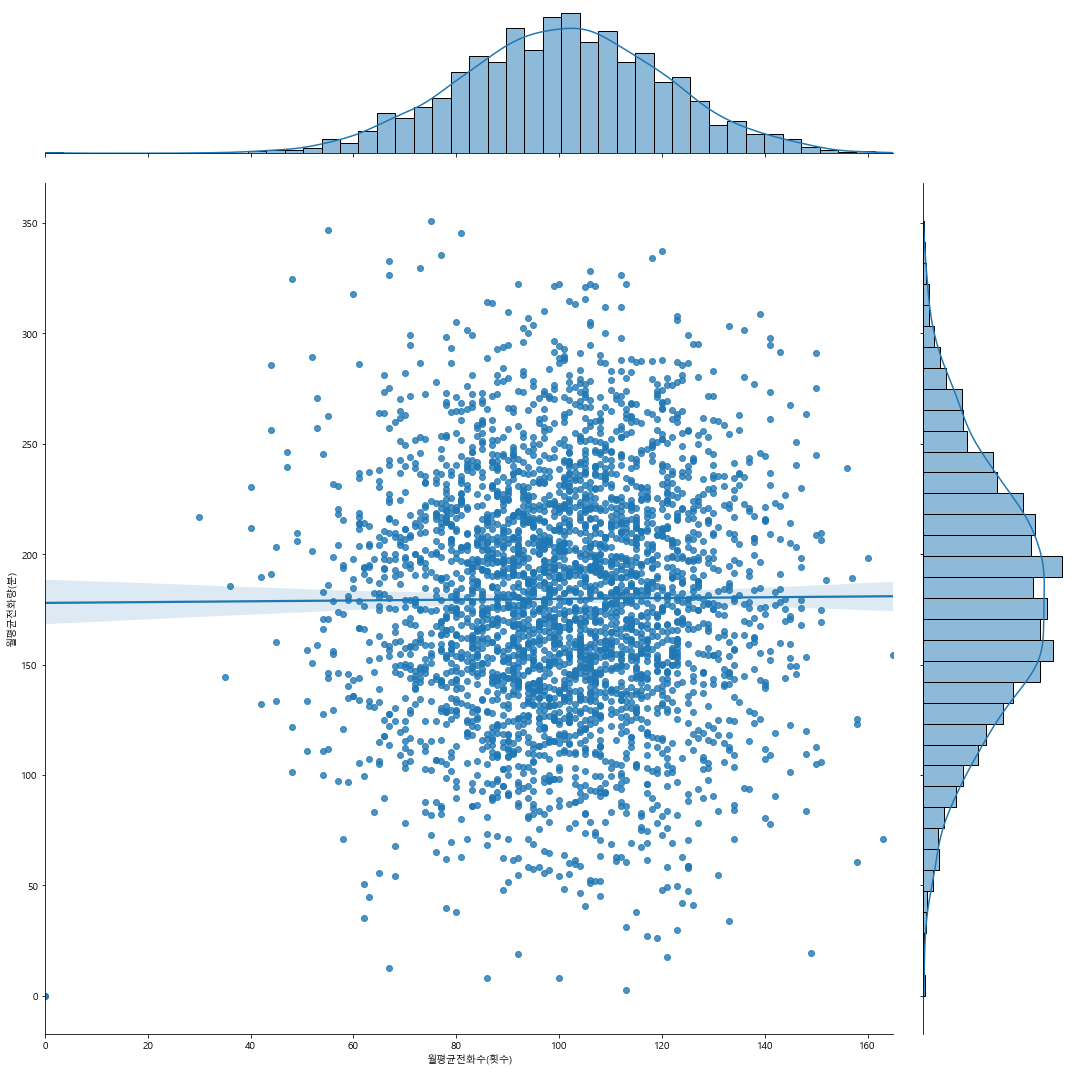

In [33]:
sns.jointplot(x="월평균전화수(횟수)", y="월평균전화량(분)", height=15, data=df5, kind="reg")
plt.show()

<AxesSubplot:xlabel='월평균전화수(횟수)', ylabel='월평균전화량(분)'>

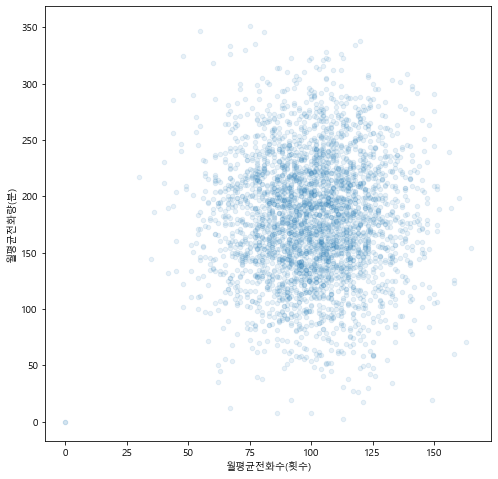

In [49]:
#산포도

fig, ax = plt.subplots(figsize=(8, 8))
df5.plot.scatter(
    x='월평균전화수(횟수)',
    y='월평균전화량(분)',
    alpha=.1,
    ax=ax
)

- 데이터 수가 너무 많아 상관관계를 한눈에 파악하기 어렵다

## 특정데이터를 뽑아 재상관분석

In [94]:
#월평균전화량이 가장많은 순으로 상위 100개를 뽑아 분석해볼 예정이다.
number1=(
df5.sort_values(['월평균전화량(분)'],ascending = False)
).head(100)

number1

,월평균전화량(분),월평균전화수(횟수)
365,350.799988,75
985,346.799988,55
2594,345.299988,81
156,337.399994,120
605,335.500000,77
...,...,...
1645,283.100006,112
117,282.500000,114
661,282.299988,70
106,281.399994,102


## 재시각화

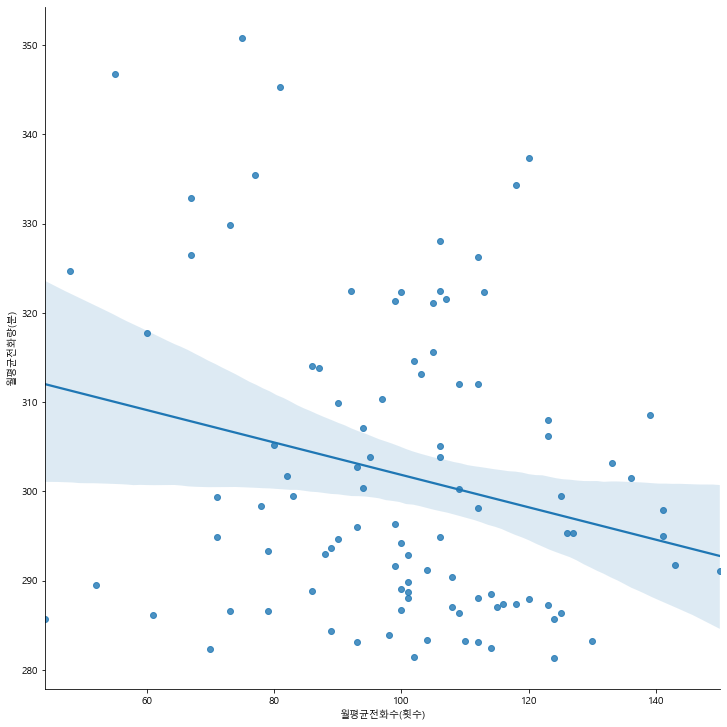

In [95]:
# 상관관계에 회귀선 추가
sns.lmplot(x="월평균전화수(횟수)", y="월평균전화량(분)", height=10, data=number1)
plt.show()

<AxesSubplot:>

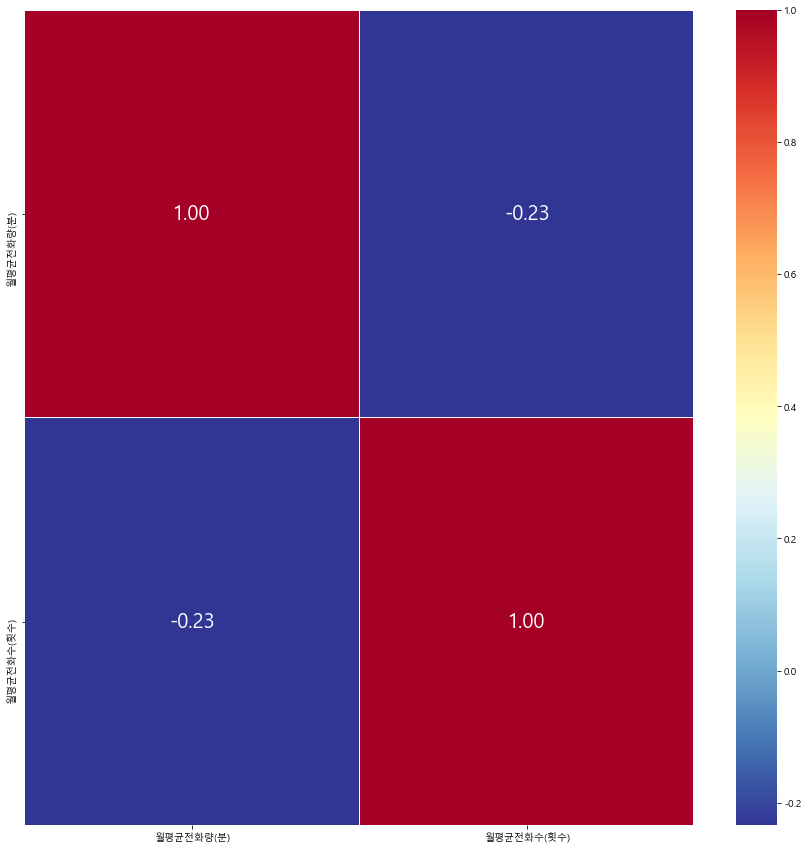

In [96]:
#변수간 상관관계 분석 그래프
plt.figure(figsize=(15,15))
sns.heatmap(data = number1.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap = 'RdYlBu_r', annot_kws = {'size' : 20})

- 월평균전화량이 가장많은 순으로 상위 100개를 뽑아 상관 분석을 해본 결과 음의 상관관계를 띄는 것을 확인할 수 있었다.

In [134]:
#반대로, 월평균전화수가 가장많은 순으로 상위 100개를 뽑아 분석해볼 예정이다.
number2=(
df5.sort_values(['월평균전화수(횟수)'],ascending = False)
).head(100)

number2

,월평균전화량(분),월평균전화수(횟수)
1121,154.399994,165
468,70.900002,163
1460,198.100006,160
2392,125.400002,158
1057,123.000000,158
...,...,...
1406,125.500000,139
3266,155.199997,139
616,128.199997,138
2277,123.699997,138


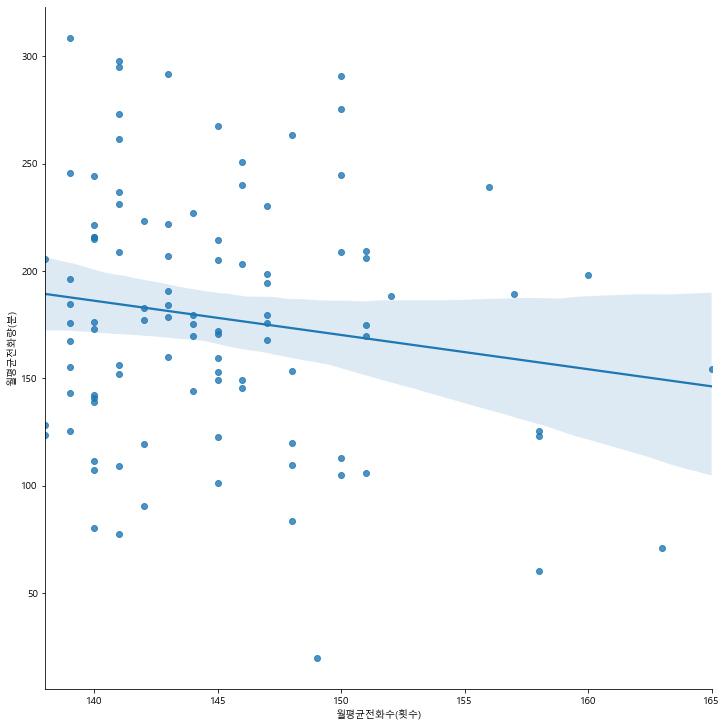

In [98]:
# 상관관계에 회귀선 추가
sns.lmplot(x="월평균전화수(횟수)", y="월평균전화량(분)", height=10, data=number2)
plt.show()

<AxesSubplot:>

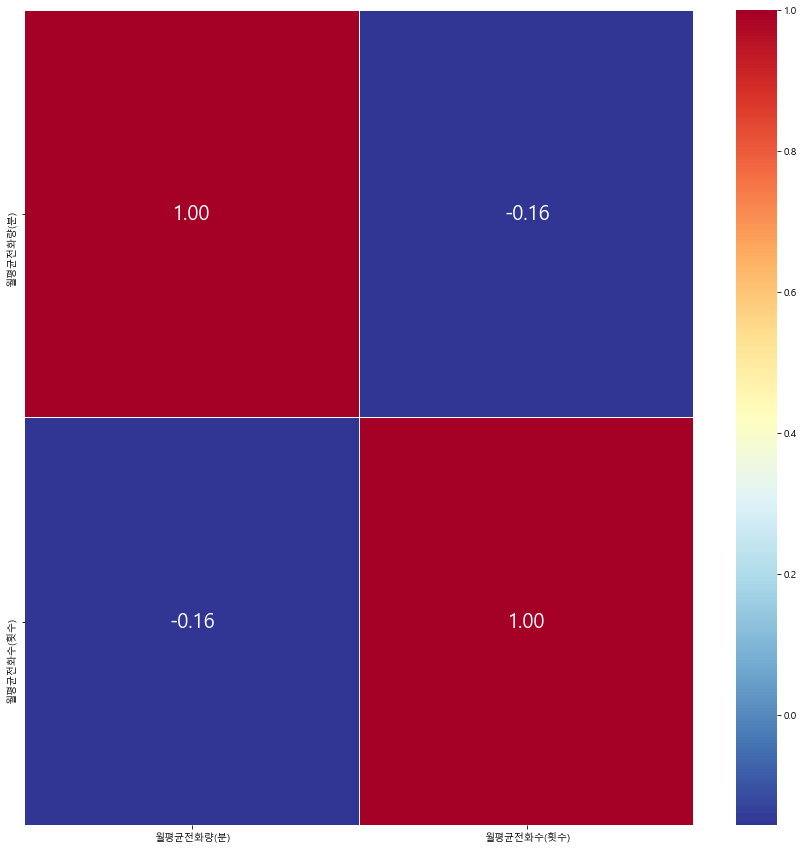

In [99]:
#변수간 상관관계 분석 그래프
plt.figure(figsize=(15,15))
sns.heatmap(data = number2.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap = 'RdYlBu_r', annot_kws = {'size' : 20})

- 월평균전화수가 가장많은 순으로 상위 100개를 뽑아 상관 분석을 해보았을 때도 동일하게 음의 상관관계를 띄는 것을 확인할 수 있었다.

# 의미도출 및 결과

- 3333개의 데이터를 갖고 상관분석을 하였을 때는 데이터 수가 많아 상관관계가 잘 나타나지 않았는데,
- 해당 데이터의 많은 순으로 100개를 선정하여 재 상관분석을 해보니,
- 높은 수치의 음의 상관관계 결과가 나온 것은 아니지만, 월평균 전화량이 많으면 전화수가 적은 반비례하다는 결과를 파악할 수 있다.
- 월평균 전화량이 많다고해서 전화 하는 횟수가 많은 것은 아니라는 결과를 도출할 수 있다.
- (여러 번 전화하지 않고, 한 번 전화를 할 때 오래 통화를 하는 경우가 많다고 예측할 수있음.)

# 번외)

### - 전화량이 많은 사람들의 공통점에는 무엇이 있을까?

In [147]:
#전화량이 많은 순 상위 20개 선정
number10=(
df4.sort_values(['월평균전화량(분)'],ascending = False)
).head(20)

number10

,가입해지여부,가입기간,가입갱신여부,데이터요금제사용여부,데이터사용량(GB),고객센터전화량,월평균전화량(분),월평균전화수(횟수),월평균요금,초과요금,로밍시간(분)
365,1,154,1,0,0,1,350.799988,75,79.000000,10.828125,10.101562
985,1,64,0,0,0,1,346.799988,55,81.000000,12.476562,13.296875
2594,1,115,0,0,0,1,345.299988,81,76.000000,10.171875,11.796875
156,1,83,1,0,0,0,337.399994,120,77.000000,11.367188,15.796875
605,1,112,1,0,0,2,335.500000,77,76.000000,10.632812,12.703125
975,1,129,1,0,0,0,334.299988,118,74.000000,9.609375,10.398438
15,1,161,1,0,0,4,332.899994,67,84.000000,15.890625,5.398438
1679,1,82,1,0,0,0,329.799988,73,74.000000,10.421875,10.601562
2028,1,93,1,0,0,1,328.100006,106,71.900002,7.589844,8.703125
197,1,208,1,0,0,2,326.500000,67,74.300003,8.820312,10.703125


In [148]:
# 각 순위대로 이름 변경
number10.rename(index={365: '전화량1', 985: '전화량2', 2594: '전화량3', 156: '전화량4', 605: '전화량5', 975: '전화량6', 15: '전화량7' , 1679: '전화량8',
                     2028: '전화량9', 197: '전화량10', 2412: '전화량11', 2824: '전화량12', 832: '전화량13', 2629: '전화량14', 3132: '전화량15', 1078: '전화량16', 901: '전화량17' , 1334: '전화량18',
                     3322: '전화량19', 2572: '전화량20'}, inplace=True)
number10

,가입해지여부,가입기간,가입갱신여부,데이터요금제사용여부,데이터사용량(GB),고객센터전화량,월평균전화량(분),월평균전화수(횟수),월평균요금,초과요금,로밍시간(분)
전화량1,1,154,1,0,0,1,350.799988,75,79.000000,10.828125,10.101562
전화량2,1,64,0,0,0,1,346.799988,55,81.000000,12.476562,13.296875
전화량3,1,115,0,0,0,1,345.299988,81,76.000000,10.171875,11.796875
전화량4,1,83,1,0,0,0,337.399994,120,77.000000,11.367188,15.796875
전화량5,1,112,1,0,0,2,335.500000,77,76.000000,10.632812,12.703125
전화량6,1,129,1,0,0,0,334.299988,118,74.000000,9.609375,10.398438
전화량7,1,161,1,0,0,4,332.899994,67,84.000000,15.890625,5.398438
전화량8,1,82,1,0,0,0,329.799988,73,74.000000,10.421875,10.601562
전화량9,1,93,1,0,0,1,328.100006,106,71.900002,7.589844,8.703125
전화량10,1,208,1,0,0,2,326.500000,67,74.300003,8.820312,10.703125


In [178]:
#요약통계
number10.describe().T

,count,mean,std,min,25%,50%,75%,max
가입기간,20.0,110.150000,43.898537,23.000000,81.750000,102.500000,143.750000,208.000000
데이터사용량(GB),20.0,0.050000,0.223607,0.000000,0.000000,0.000000,0.000000,1.000000
고객센터전화량,20.0,1.300000,1.174286,0.000000,0.750000,1.000000,2.000000,4.000000
월평균전화량(분),20.0,329.484955,9.514931,317.799988,322.299988,326.399994,334.599991,350.799988
월평균전화수(횟수),20.0,89.050000,22.479172,48.000000,71.500000,95.500000,106.250000,120.000000
월평균요금,20.0,76.215004,6.236503,68.000000,73.750000,75.500000,77.250000,97.099998
초과요금,20.0,10.835938,2.175781,7.589844,9.412109,10.730469,11.984375,15.890625
로밍시간(분),20.0,10.093750,2.613281,5.398438,7.950195,10.398438,11.574219,15.796875


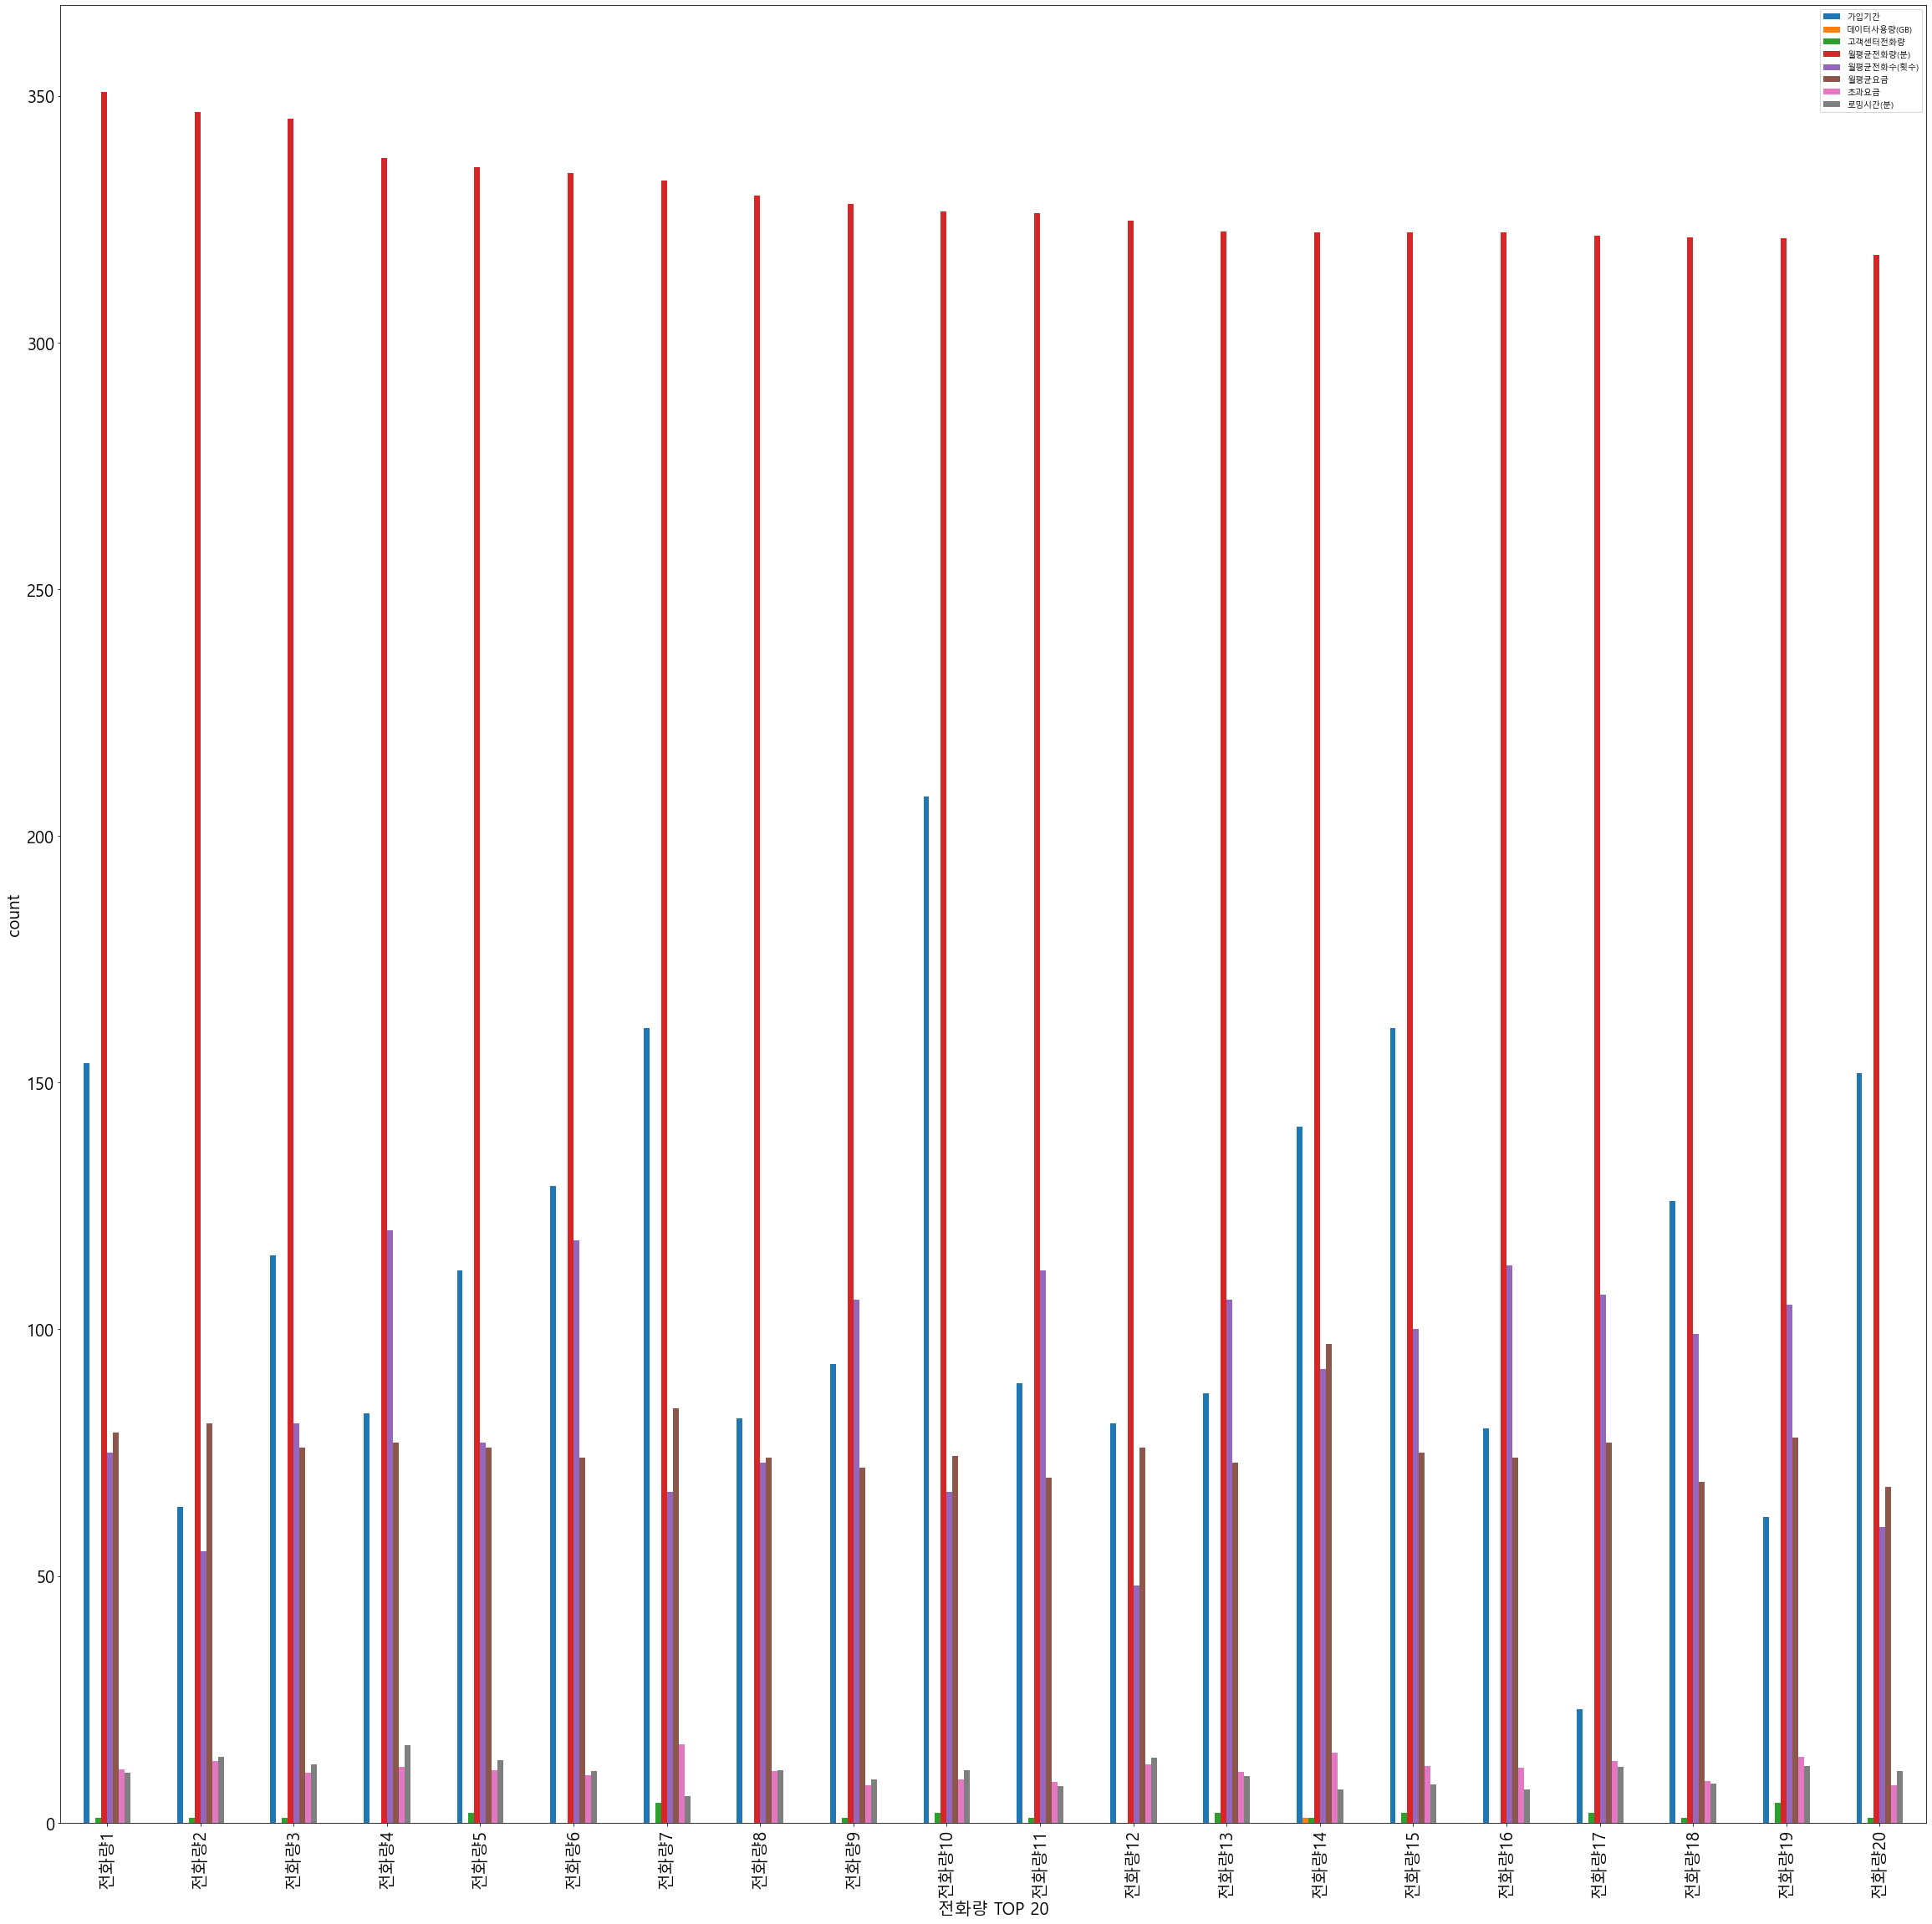

In [177]:
#한눈에 보기 쉽도록 표로 선정
import matplotlib.pyplot as plt

number10.plot(kind='bar', fontsize="20", figsize=(40,40))
plt.xlabel('전화량 TOP 20', fontsize="20")
plt.ylabel('count', fontsize="20")

plt.show()

- 표로 보았을 때, 다른 점들보다도 흡사한 점은 월평균 요금이 비슷한 것을 파악할 수 있다. 

## 두번째 분석포인트

- 월평균 요금이 적으면 초과요금이 나오는 경우가 많을까?
- 라는 분석포인트를 선정하게 된 이유는 월 평균 요금이 적으면 보통 요금제에 따라 데이터를 사용할 수 있는 양이 정해지기 때문에
- 월 평균 요금이 적으면 데이터를 사용할 수 있는 양이 적어 초과요금이 많이 나올 것이라고 생각하며 이를 중점적으로 분석해보았다.

In [108]:
#필요데이터만 선정
df6 = df4[['월평균요금', '초과요금']]
df6

,월평균요금,초과요금
0,89.000000,9.867188
1,82.000000,9.781250
2,52.000000,6.058594
3,57.000000,3.099609
4,41.000000,7.421875
...,...,...
3328,71.699997,10.781250
3329,56.400002,7.671875
3330,56.000000,14.437500
3331,50.000000,7.980469


In [112]:
#월평균요금의 최소값 순서배열 
(
df6.sort_values(['월평균요금', '초과요금'], ascending = True)
.drop_duplicates(subset='월평균요금')
)

,월평균요금,초과요금
1345,14.000000,7.980469
1986,15.700000,6.820312
2859,16.000000,3.380859
2252,17.000000,8.093750
1538,19.000000,4.621094
...,...,...
575,108.300003,10.023438
1821,108.599998,12.257812
1355,108.699997,12.031250
670,110.000000,11.617188


- 가장 작은 월평균 요금은 14이다.

In [113]:
#변수의 상관관계
df6.corr()

,월평균요금,초과요금
월평균요금,1.000000,0.281757
초과요금,0.281757,1.000000


## 시각화

<AxesSubplot:>

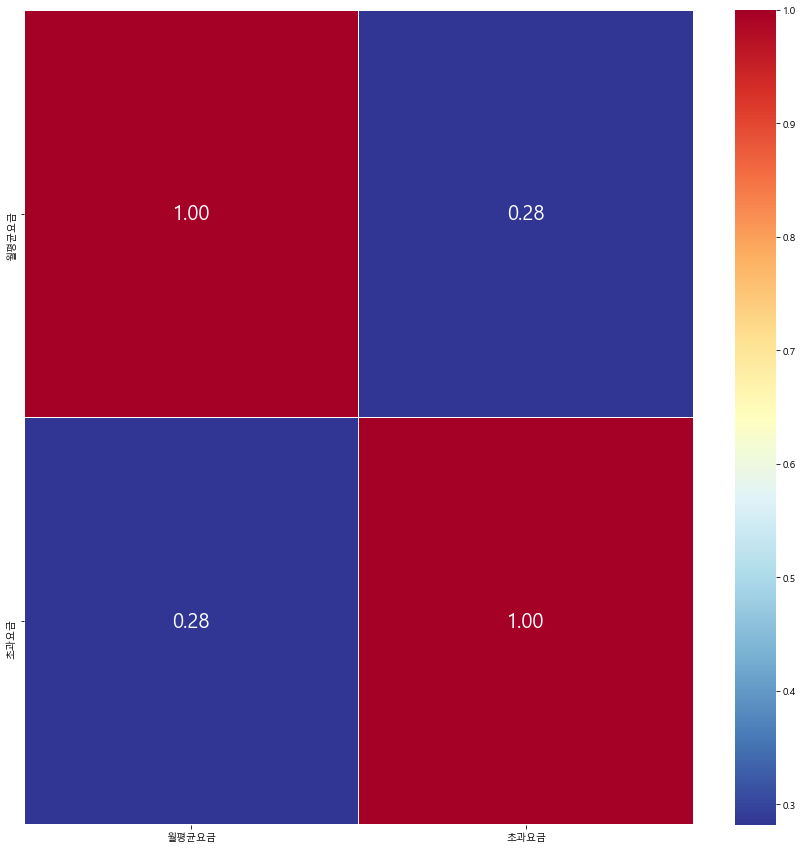

In [114]:
#변수간 상관관계 분석 그래프
plt.figure(figsize=(15,15))
sns.heatmap(data = df6.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap = 'RdYlBu_r', annot_kws = {'size' : 20})

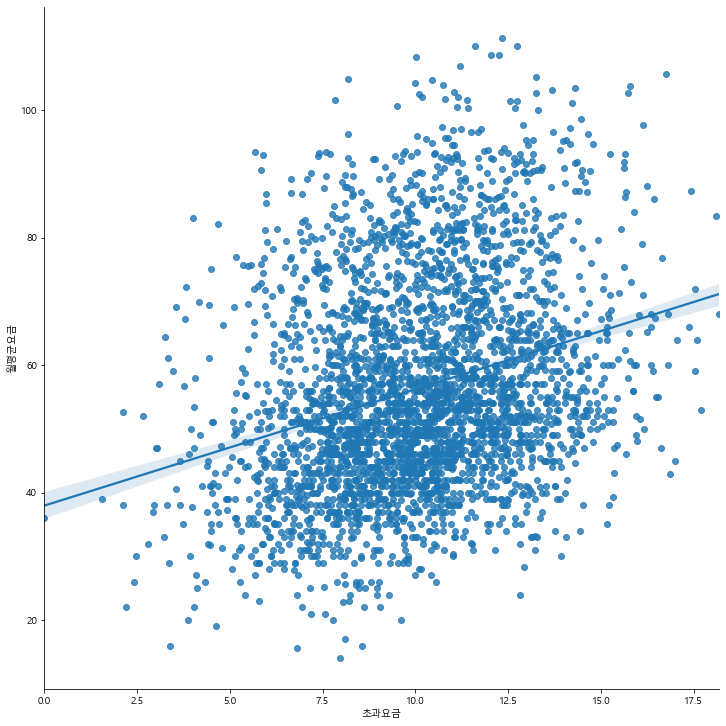

In [115]:
# 상관관계에 회귀선 추가
sns.lmplot(x="초과요금", y="월평균요금", height=10, data=df2)
plt.show()

<AxesSubplot:xlabel='초과요금', ylabel='월평균요금'>

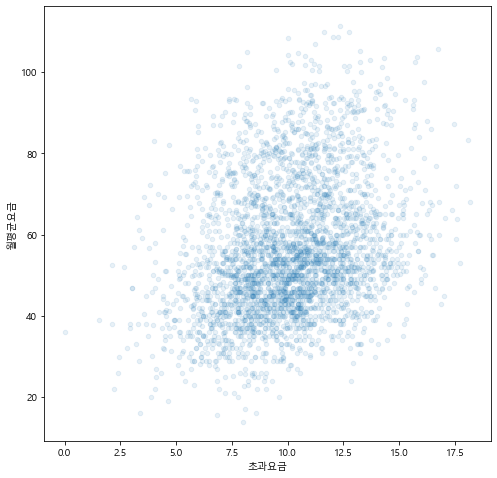

In [116]:
#산포도

fig, ax = plt.subplots(figsize=(8, 8))
df6.plot.scatter(
    x='초과요금',
    y='월평균요금',
    alpha=.1,
    ax=ax
)

In [123]:
#월평균 요금이 작은 순으로 상위 100개의 데이터 선정
number3=(
df6.sort_values(['월평균요금'],ascending = True)
).head(100)

number3

,월평균요금,초과요금
1345,14.0,7.980469
1986,15.7,6.820312
2859,16.0,3.380859
2753,16.0,8.570312
2252,17.0,8.093750
...,...,...
426,31.0,5.671875
1112,31.0,7.781250
2201,31.0,9.039062
1727,31.0,7.960938


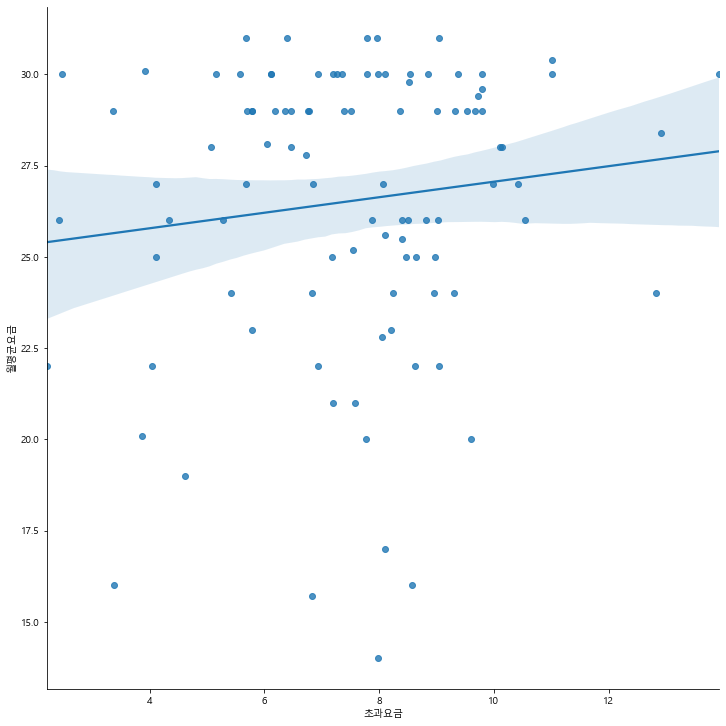

In [121]:
# 상관관계에 회귀선 추가
sns.lmplot(x="초과요금", y="월평균요금", height=10, data=number3)
plt.show()

<AxesSubplot:>

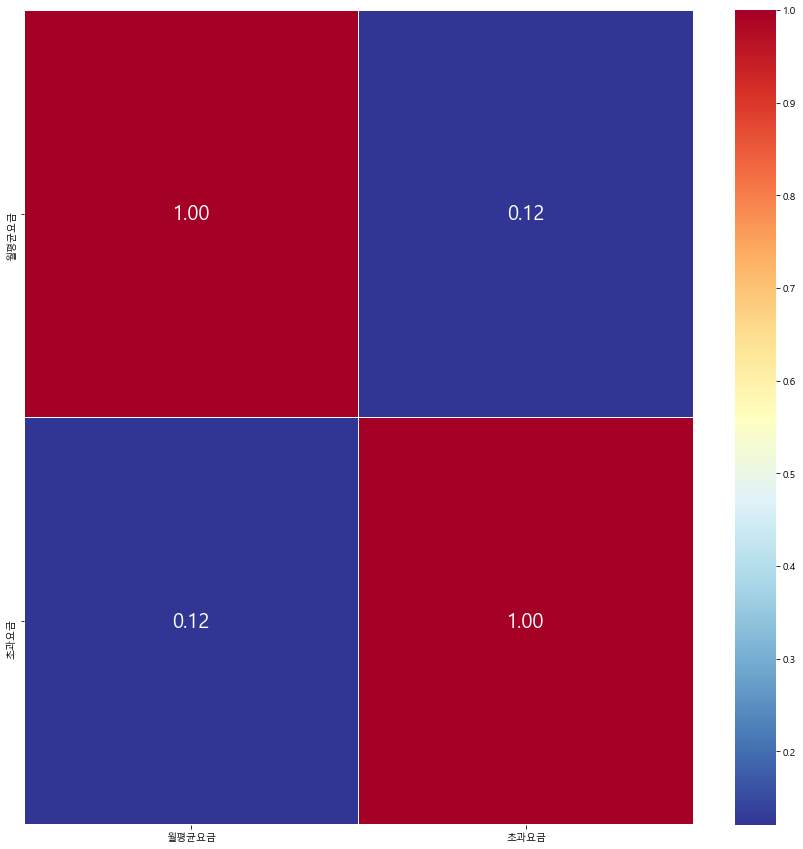

In [122]:
#변수간 상관관계 분석 그래프
plt.figure(figsize=(15,15))
sns.heatmap(data = number3.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap = 'RdYlBu_r', annot_kws = {'size' : 20})

# 의미도출 및 결과

- 월 평균 요금이 작으면 데이터를 사용할 수 있는 양이 적어 초과요금이 많이 나올 것이라고 예측하여 분석해보고자한 것과 달리,
- 월 평균 요금과 초과요금은 양의 상관관계를 나타내며, 초과요금과 월 평균 요금은 정비례 관계임을 파악할 수 있었다.
- 월 평균 요금이 많으면 초과요금이 나오는 경우가 많다는 사실을 도출해낼 수 있었다.
- (평균 요금이 적은 사람들은 핸드폰 사용량이 적은 것이라고 예측할 수 있다.)

# 세번째 분석포인트

- 가입기간이 길면 초과요금이 적을까?
- 라는 분석포인트를 선정하게 된 이유는, 가입기간이 길면 핸드폰을 사용하게 된 기간도 긴 것으로 볼 수 있다.
- 많이 사용해보았음으로 자신에게 알맞은 요금을 알 것이라고 생각하여 가입기간이 길면 초과요금이 적을 것이라고 생각하며 이를 분석해보았다.

In [124]:
#필요데이터만 선정
df7 = df4[['가입기간', '초과요금']]
df7

,가입기간,초과요금
0,128,9.867188
1,107,9.781250
2,137,6.058594
3,84,3.099609
4,75,7.421875
...,...,...
3328,192,10.781250
3329,68,7.671875
3330,28,14.437500
3331,184,7.980469


In [135]:
#가입기간의 최대값 순서배열 
(
df7.sort_values(['가입기간', '초과요금'], ascending = False)
.drop_duplicates(subset='가입기간')
)

,가입기간,초과요금
817,243,8.187500
1408,232,9.796875
1551,225,13.687500
1886,224,8.750000
3216,221,11.210938
...,...,...
960,5,9.367188
2309,4,15.187500
2801,3,12.539062
1322,2,6.949219


- 가입기간은 243이 가장 길다.

In [136]:
#변수의 상관관계
df7.corr()

,가입기간,초과요금
가입기간,1.000000,-0.006743
초과요금,-0.006743,1.000000


- 약간의 음의 상관관계를 나타내고 있다.

In [137]:
#가입기간이 긴 순서로 상위 100개의 데이터 선정하여 분석할 예정이다.
number4=(
df7.sort_values(['가입기간'],ascending = False)
).head(100)

number4

,가입기간,초과요금
817,243,8.187500
1408,232,9.796875
1751,225,12.328125
1551,225,13.687500
1886,224,8.750000
...,...,...
770,179,9.562500
1571,179,8.210938
174,179,7.468750
351,179,11.718750


## 시각화

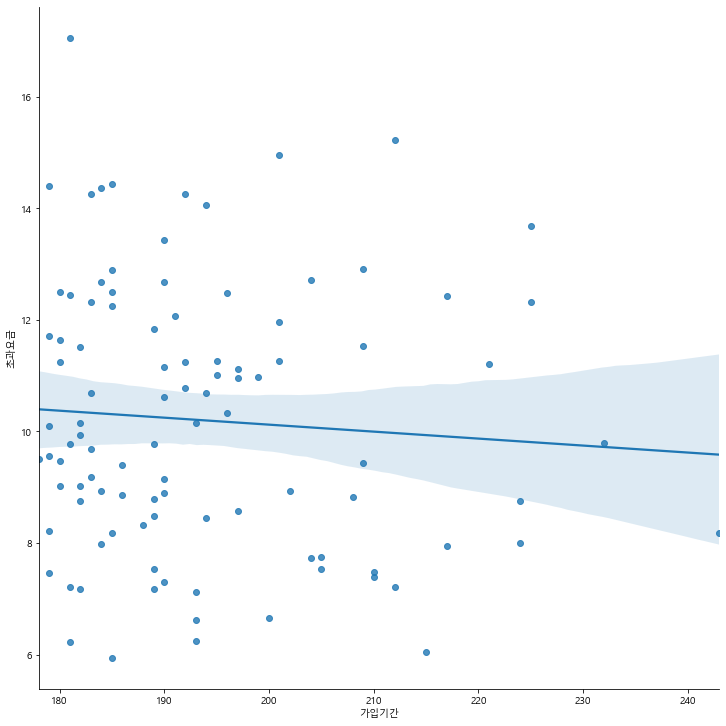

In [131]:
# 상관관계에 회귀선 추가
sns.lmplot(x="가입기간", y="초과요금", height=10, data=number4)
plt.show()

<AxesSubplot:>

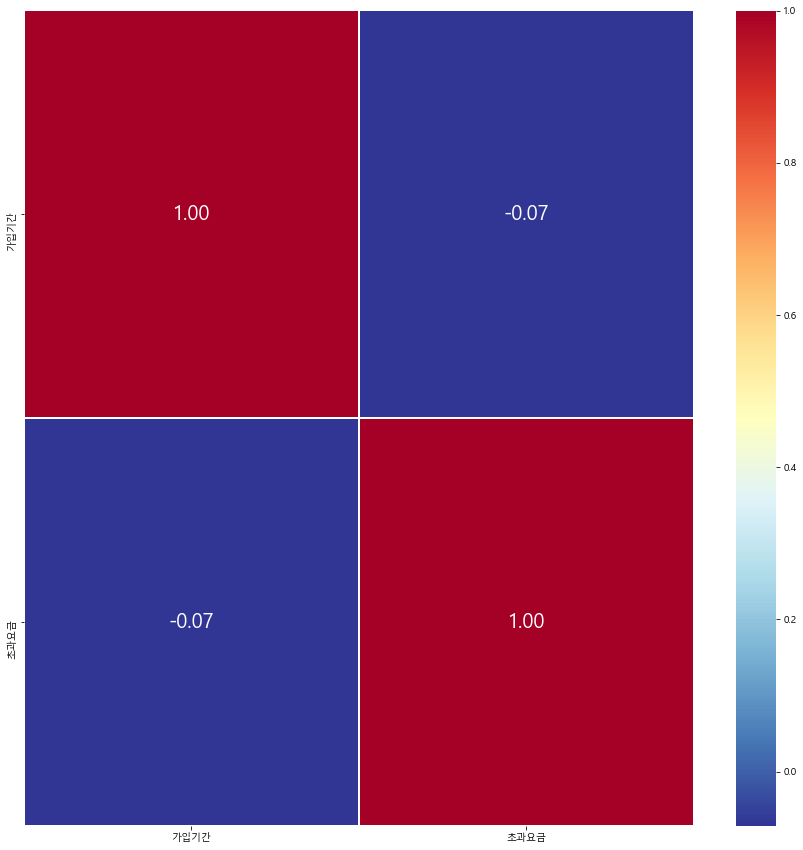

In [132]:
#변수간 상관관계 분석 그래프
plt.figure(figsize=(15,15))
sns.heatmap(data = number4.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap = 'RdYlBu_r', annot_kws = {'size' : 20})

- 가입기간과 초과요금은 음의 상관관계를 나타내고 있음을 파악할  수 있다. 

# 의미도출 및 분석결과

- 가입기간이 길면 초과요금이 적을까?라는 분석 포인트와 같이 
- 가입기간과 초과요금의 상관관계는 음의 상관관계로 가입기간이 길면 초과요금은 적은 반비례 관계임을 알 수 있었다.
- 처음 예측한 것과 같이 가입기간이 길면 자신에게 맞는 요금을 잘 파악하고 있기에 초과요금이 나올 경우가 적다는 상황을 예측할 수 있다.

# 마무리 및 소감

- 이동통신 사용자 데이터를 통해 월평균 전화량이 많을수록 월평균 전화횟수가 많을까?, 월평균 요금이 적으면 초과요금이 나오는 경우가 많을까?, 가입기간이 길면 초과요금이 적을까? 라는 중점 포인트를 갖고, 각각의 변수 간의 상관관계에 대해 분석을 해보았다.
- 3333개의 다소 많은 데이터를 접해보니 처음에는 분석하기 어려웠지만, 일부 데이터만을 선정해서 분석하여 이를 해결하였다.
- 앞으로 이보다 더 많은 양의 데이터를 접하게 될 것이라고 생각하고, 그러한 데이터를 잘 다룰 수 있도록 더 많은 공부가 필요하다고 느꼈다.
- 처음 판다스를 배우면서 한 번에 다양한 것을 배우게 되면서 어려웠던 점도 많았지만,
- 꾸준히 계속 다양한 데이터에 대해 분석해보면 정말 활용도가 높은 프로그래밍이라고 생각이 들었다.
- 교수님의 말씀처럼 배운 것을 까먹지 않도록 재복습하며 익혀나가는 점이 중요한 것을 인지하며 프로젝트를 마무리한다.

- 교수님 한 학기동안 감사했습니다! :)